In [1]:
"""import packages"""
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from math import pi
import functools

import tensorflow as tf
from tensorflow import keras

import xlrd
from scipy.io import loadmat
import pandas as pd

In [2]:
"""load data files"""
matFile = loadmat('Pappas_Pulsed_pl200_ge_start800_int1us_1kAvg_multishot_3_mag.mat')
Data = matFile['Data']

vS1File = pd.read_excel('vS1.xlsx', sheet_name='vS1')

In [3]:
"""access columns of VS1 in data set"""
df = pd.DataFrame(vS1File)
vS1_list1 = df.columns.tolist()

"""divide VS1 data into x0 (|g>) and x1 (|e>)"""
x0 = []
x1 = []
for i in range(6700):
    x0.append(np.float(vS1_list1[i]))
for i in list(range(6700,13400)):
    x1.append(np.float(vS1_list1[i]))

In [4]:
"""access cY data and make accessible to plot by pyplot"""
cY_list1 = []
for sublist in Data['cY']:
    for item in sublist:
        cY_list1.append(item)

cY_arr = np.array(cY_list1)
cY_list2 = cY_arr.tolist()
        
cY_list3 = []
for sublist in cY_list2:
    for item in sublist:
        cY_list3.append(item)
        
cY_list4 = []
for sublist in cY_list3:
    for item in sublist:
        cY_list4.append(item)
        
cY_list5 = []
for sublist in cY_list4:
    for item in sublist:
        cY_list5.append(item)
        
cY_list6 = []
for sublist in cY_list5:
    for item in sublist:
        cY_list6.append(np.complex(item))

In [5]:
"""append mag, phase, I, Q data into numpy arrays"""
mag0 = []
mag1 = []
phase0 = []
phase1 = []
I0 = []
I1 = []
Q0 = []
Q1 = []

x0_avg = []
mag0_avg = []
phase0_avg = []
I0_avg = []
Q0_avg = []

x1_avg = []
mag1_avg = []
phase1_avg = []
I1_avg = []
Q1_avg = []

for i in range(6700):
    mag0.append(abs(cY_list6[i]))
    phase0.append(np.angle(cY_list6[i]))
    I0.append(np.real(cY_list6[i]))
    Q0.append(np.imag(cY_list6[i]))
    
for j in list(range(99,6799,100)):
    x_100 = []
    mag_100 = []
    phase_100 = []
    I_100 = []
    Q_100 = []
    
    for k in list(range(j-99,j)):
        x_100.append(x0[k])
        mag_100.append(mag0[k])
        phase_100.append(phase0[k])
        I_100.append(I0[k])
        Q_100.append(Q0[k])
        
    x0_avg.append(np.mean(x_100))
    mag0_avg.append(np.mean(mag_100))
    phase0_avg.append(np.mean(phase_100))
    I0_avg.append(np.mean(I_100))
    Q0_avg.append(np.mean(Q_100))
    
for i in list(range(6700,13400)):
    mag1.append(abs(cY_list6[i]))
    phase1.append(np.angle(cY_list6[i]))
    I1.append(np.real(cY_list6[i]))
    Q1.append(np.imag(cY_list6[i]))
    
for j in list(range(0,6700,100)):
    x_100 = []
    mag_100 = []
    phase_100 = []
    I_100 = []
    Q_100 = []
    
    for k in list(range(j,j+99)):
        x_100.append(x1[k])
        mag_100.append(mag1[k])
        phase_100.append(phase1[k])
        I_100.append(I1[k])
        Q_100.append(Q1[k])
    
    x1_avg.append(np.mean(x_100))
    mag1_avg.append(np.mean(mag_100))
    phase1_avg.append(np.mean(phase_100))
    I1_avg.append(np.mean(I_100))
    Q1_avg.append(np.mean(Q_100))

In [6]:
"""consolidate the S_{2,1} of the readout resonator"""
readout_ind_avg = mag0_avg.index(min(mag0_avg))
readout_ind = mag0.index(min(mag0))

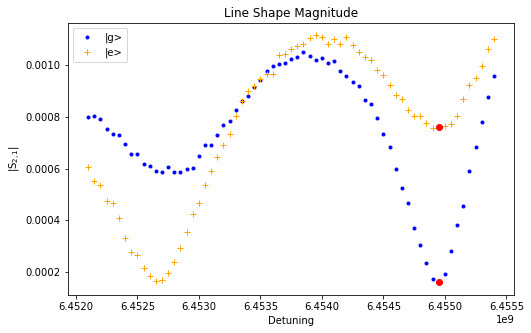

In [7]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x0_avg,mag0_avg,'b.',label='|g>')
ax.plot(x1_avg,mag1_avg,'+',color='orange',label='|e>')

ax.plot(x0_avg[readout_ind_avg],mag0_avg[readout_ind_avg],'o',color='red')
ax.plot(x1_avg[readout_ind_avg],mag1_avg[readout_ind_avg],'o',color='red')

plt.title('Line Shape Magnitude')
plt.xlabel('Detuning')
plt.ylabel('|S$_{2,1}$|')
plt.legend()

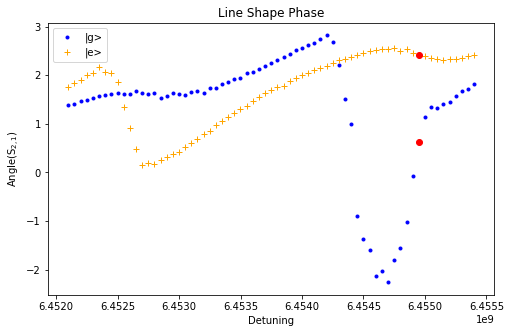

In [8]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(x0_avg,phase0_avg,'b.',label='|g>')
ax.plot(x1_avg,phase1_avg,'+',color='orange',label='|e>')

ax.plot(x0_avg[readout_ind_avg],phase0_avg[readout_ind_avg],'o',color='red')
ax.plot(x1_avg[readout_ind_avg],phase1_avg[readout_ind_avg],'o',color='red')

plt.title('Line Shape Phase')
plt.xlabel('Detuning')
plt.ylabel('Angle(S$_{2,1}$)')
plt.legend()

In [23]:
I0_readout = []
I1_readout = []
Q0_readout = []
Q1_readout = []

for i in list(range(readout_ind-500,readout_ind+500)):
    I0_readout.append(np.real(cY_list6[i]))
    Q0_readout.append(np.imag(cY_list6[i]))
        
for i in list(range(6700+readout_ind-500,6700+readout_ind+500)):
    I1_readout.append(np.real(cY_list6[i]))
    Q1_readout.append(np.imag(cY_list6[i]))

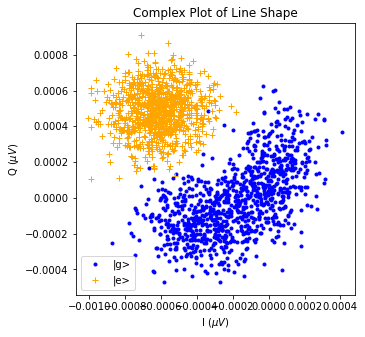

In [24]:
"""plot IQ plot for S_{2,1}"""
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(I0_readout,Q0_readout,'b.',label='|g>')
ax.plot(I1_readout,Q1_readout,'+',color='orange',label='|e>')

plt.title('Complex Plot of Line Shape')
plt.xlabel('I ($\mu V$)')
plt.ylabel('Q ($\mu V$)')
plt.legend(loc='lower left')

In [25]:
dist = []   # distance list

for i in range(1000):
    I_dist = I1[i] - I0[i]
    Q_dist = Q1[i] - Q0[i]
    dist.append(np.sqrt(I_dist**2+Q_dist**2))
    
max_index = dist.index(max(dist))
print(vS1_list1[max_index])

dist.pop(max_index)
sec_max_index = dist.index(max(dist))
print(vS1_list1[sec_max_index])

dist.pop(sec_max_index)
thi_max_index = dist.index(max(dist))
print(vS1_list1[thi_max_index])

6452499968.58
6452349952.52
6452550144.92


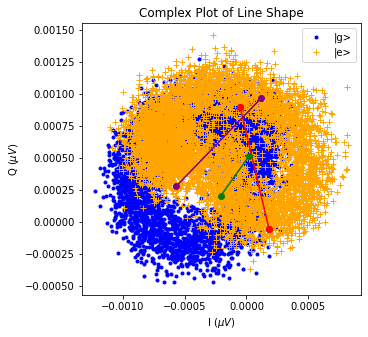

In [26]:
"""plot IQ plot for S_{2,1}, accounting for distance between |g> and |e> at each readout frequency"""
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(I0,Q0,'b.',label='|g>')
ax.plot(I1,Q1,'+',color='orange',label='|e>')

ax.plot(I0[max_index],Q0[max_index],'o',color='red')
ax.plot(I1[max_index],Q1[max_index],'o',color='red')

ax.plot(I0[max_index],Q0[max_index],'ro')
ax.plot(I1[max_index],Q1[max_index],'ro')

I_vec = [I1[max_index],I0[max_index]]
Q_vec = [Q1[max_index],Q0[max_index]]
ax.plot(I_vec,Q_vec,'r')

ax.plot(I0[sec_max_index],Q0[sec_max_index],'o',color='purple')
ax.plot(I1[sec_max_index],Q1[sec_max_index],'o',color='purple')

I_vec_sec = [I1[sec_max_index],I0[sec_max_index]]
Q_vec_sec = [Q1[sec_max_index],Q0[sec_max_index]]
ax.plot(I_vec_sec,Q_vec_sec,color='purple')

ax.plot(I0[thi_max_index],Q0[thi_max_index],'go')
ax.plot(I1[thi_max_index],Q1[thi_max_index],'go')

I_vec_thi = [I1[thi_max_index],I0[thi_max_index]]
Q_vec_thi = [Q1[thi_max_index],Q0[thi_max_index]]
ax.plot(I_vec_thi,Q_vec_thi,'g')

plt.title('Complex Plot of Line Shape')
plt.xlabel('I ($\mu V$)')
plt.ylabel('Q ($\mu V$)')
plt.legend()

In [27]:
def distance(x_vec,y_vec):
    x = x_vec[1]-x_vec[0]
    y = y_vec[1]-y_vec[0]
    return np.sqrt(x**2+y**2)

print('The distance between the red dots is',distance(I_vec,Q_vec))
print('The distance between the purple dots is',distance(I_vec_sec,Q_vec_sec))
print('The distance between the green dots is',distance(I_vec_thi,Q_vec_thi))

The distance between the red dots is 0.0009829592550131727
The distance between the purple dots is 0.000975610590142997
The distance between the green dots is 0.00038913223346663604


In [28]:
I0_readout = []
I1_readout = []
Q0_readout = []
Q1_readout = []

for i in list(range(max_index-500,max_index+500)):
    I0_readout.append(np.real(cY_list6[i]))
    Q0_readout.append(np.imag(cY_list6[i]))
        
for i in list(range(6700+max_index-500,6700+max_index+500)):
    I1_readout.append(np.real(cY_list6[i]))
    Q1_readout.append(np.imag(cY_list6[i]))

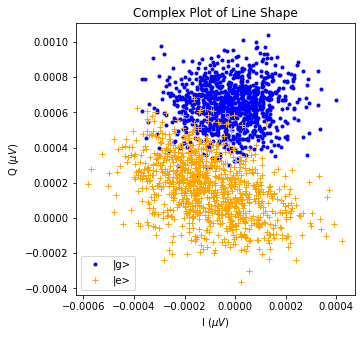

In [29]:
"""plot IQ plot for S_{2,1}"""
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(I0_readout,Q0_readout,'b.',label='|g>')
ax.plot(I1_readout,Q1_readout,'+',color='orange',label='|e>')

plt.title('Complex Plot of Line Shape')
plt.xlabel('I ($\mu V$)')
plt.ylabel('Q ($\mu V$)')
plt.legend(loc='lower left')

In [30]:
I0_readout = []
I1_readout = []
Q0_readout = []
Q1_readout = []

for i in range(1000):
    I0_readout.append(np.real(cY_list6[i]))
    Q0_readout.append(np.imag(cY_list6[i]))
        
for i in list(range(6700+readout_ind-500,6700+readout_ind+500)):
    I1_readout.append(np.real(cY_list6[i]))
    Q1_readout.append(np.imag(cY_list6[i]))

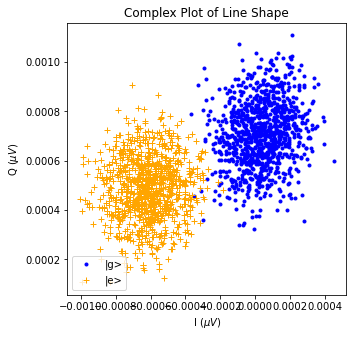

In [31]:
"""plot IQ plot for S_{2,1}"""
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(I0_readout,Q0_readout,'b.',label='|g>')
ax.plot(I1_readout,Q1_readout,'+',color='orange',label='|e>')

plt.title('Complex Plot of Line Shape')
plt.xlabel('I ($\mu V$)')
plt.ylabel('Q ($\mu V$)')
plt.legend(loc='lower left')